In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
from utils import train_loop, test_loop
from models import CNN_fully_connected

num_epochs = 20
lr = 0.001

model = CNN_fully_connected()
model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.8333666666666667 
Test Acc epoch 0 : 0.859 
Train Acc epoch 1 : 0.8868166666666667 
Test Acc epoch 1 : 0.8638 
Train Acc epoch 2 : 0.89855 
Test Acc epoch 2 : 0.8879 
Train Acc epoch 3 : 0.90615 
Test Acc epoch 3 : 0.8955 
Train Acc epoch 4 : 0.91495 
Test Acc epoch 4 : 0.9044 
Train Acc epoch 5 : 0.9208833333333334 
Test Acc epoch 5 : 0.9018 
Train Acc epoch 6 : 0.92575 
Test Acc epoch 6 : 0.8992 
Train Acc epoch 7 : 0.92965 
Test Acc epoch 7 : 0.8968 
Train Acc epoch 8 : 0.9337666666666666 
Test Acc epoch 8 : 0.9053 
Train Acc epoch 9 : 0.9376666666666666 
Test Acc epoch 9 : 0.8951 
Train Acc epoch 10 : 0.9397833333333333 
Test Acc epoch 10 : 0.8997 
Train Acc epoch 11 : 0.9419833333333333 
Test Acc epoch 11 : 0.9009 
Train Acc epoch 12 : 0.9438666666666666 
Test Acc epoch 12 : 0.8948 
Train Acc epoch 13 : 0.9455 
Test Acc epoch 13 : 0.8885 
Train Acc epoch 14 : 0.9481333333333334 
Test Acc epoch 14 : 0.889 
Train Acc epoch 15 : 0.9495333333333333 
Test Acc epoc

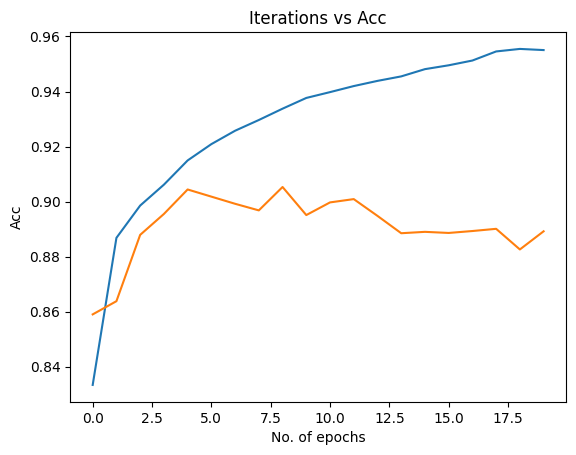

In [5]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

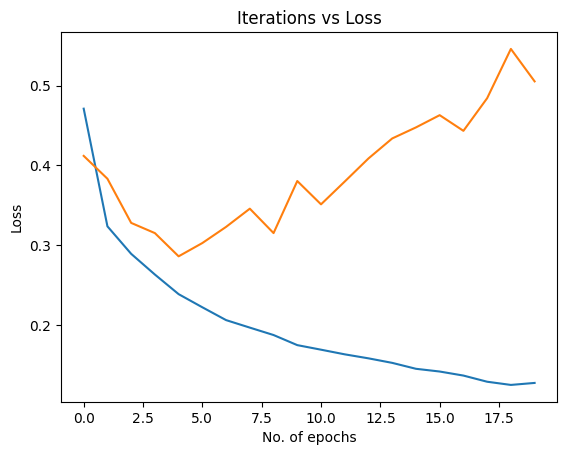

In [6]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [7]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.9053 | Best Epoch : 8


## Pickle out results and accuracies

In [8]:
import pickle
import os

file_name = 'baseline_CNN_FC_4.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [9]:
file_name = 'baseline_CNN_FC_4.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8333666666666667, 0.8868166666666667, 0.89855, 0.90615, 0.91495, 0.9208833333333334, 0.92575, 0.92965, 0.9337666666666666, 0.9376666666666666, 0.9397833333333333, 0.9419833333333333, 0.9438666666666666, 0.9455, 0.9481333333333334, 0.9495333333333333, 0.9512666666666667, 0.9545666666666667, 0.9554833333333334, 0.9550666666666666]
[0.859, 0.8638, 0.8879, 0.8955, 0.9044, 0.9018, 0.8992, 0.8968, 0.9053, 0.8951, 0.8997, 0.9009, 0.8948, 0.8885, 0.889, 0.8886, 0.8893, 0.8901, 0.8826, 0.8892]
[0.47111238062635924, 0.3236162571319893, 0.2891523375122278, 0.2631855404485009, 0.23860738178623764, 0.22213674246121062, 0.2060623914797677, 0.19665523083098152, 0.1873631958784198, 0.17470841749168153, 0.16899132724605134, 0.16316056970371876, 0.15814102167831556, 0.152467539974812, 0.1450446102776126, 0.14162398858873576, 0.13655411626007766, 0.12882437234097072, 0.12482649641139294, 0.1273248602332337]
[0.4119392058140115, 0.3832840595064284, 0.3279321995339816, 0.3151324880839903, 0.286032151289